<a href="https://colab.research.google.com/github/harshal2803/internship/blob/main/Handwritten_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction - Classification Analysis**

**Objective :** The objective of this project is to develop a machine learning model which is capable of accurately classifying and recognizing handwritten digits.

**Data Source:** To perform handwritten digit prediction the function needed for prediction of hand written digit is load_digits from sklearn library and datasets module.

## **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

## **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

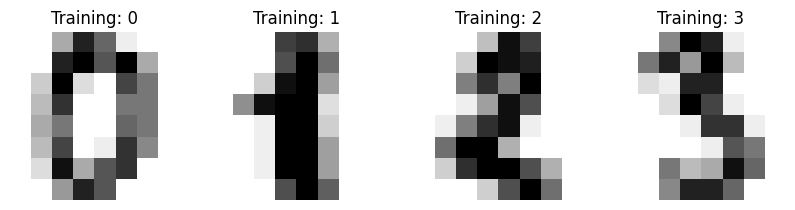

In [ ]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3)) #creates 1*4 grid of axes with total figure size is (10,3)
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training: %i" % label)

## **Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape  #return the shape of first element in 'images' column

(8, 8)

In [ ]:
len(df.images)  #return total no. of elements in 'images' column

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
data[0] #return first row of 2d array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape   #returns shape of first row

(64,)

In [ ]:
data.shape

(1797, 64)

## **Scaling Image Data**

In [ ]:
data.min()  #calculates minimum value from array

0.0

In [ ]:
data.max()    #calculates maximum value from array

16.0

In [ ]:
data=data/16  #divide each element by scalar
data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [ ]:
data.min()

0.0

In [ ]:
data.max()    #after scaling maximum value changes

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,train_size=0.3)

## **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

## **Predict Test Data**

In [ ]:
y_predict=rf.predict(X_test)

In [ ]:
y_predict

array([8, 2, 2, ..., 1, 9, 1])

## **Model Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_predict)

0.9507154213036566

In [ ]:
confusion_matrix(y_test,y_predict)

array([[123,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 116,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 125,   2,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0, 114,   0,   0,   0,   3,   4,   0],
       [  0,   0,   0,   0, 121,   0,   0,   1,   1,   0],
       [  0,   1,   0,   0,   2, 120,   0,   0,   0,   3],
       [  0,   3,   0,   0,   1,   0, 129,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126,   0,   1],
       [  0,  13,   1,   2,   0,   2,   0,   1, 107,   0],
       [  0,   2,   0,   5,   0,   3,   0,   4,   2, 115]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       125
           1       0.85      1.00      0.92       116
           2       0.99      0.98      0.98       128
           3       0.93      0.93      0.93       123
           4       0.96      0.98      0.97       123
           5       0.96      0.95      0.96       126
           6       1.00      0.97      0.98       133
           7       0.93      0.99      0.96       127
           8       0.94      0.85      0.89       126
           9       0.97      0.88      0.92       131

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258



## Explanation :

Step 1 : Import Library like pandas,numpy and matplotlib

Step 2 : Import Data
1. Data from sklearn library in which there are datasets module from which load_digits function is imported.
2. Then for analyzing image data create 1*4 grid.By using 'figsize' parameter total size of figure is 10 unit wide and 3 unit tall and result is stored into axes variable
3. It then iterates through axes, images and labels using 'zip' function. 'ax' represents each subplot,'image' represents each image and 'label' represents target of that image.'df' is data frame which has image and target columns
4. Then turn off axis ticks and labels for each subplot.This can be done to remove default axis markings and improve appearance of plots.
5. Then display the image on current subplot 'ax' with the gray colormap to display the image in grayscale.
6. The parameter 'interpolation="nearest"' used for nearest neighbor display of the image. Then label each training model by using '%i' which is replaced by corresponding label value.
The purpose of all this code is for inspecting small set of images.

Step 3 : Data Preprocessing
1. Shape of 'image' column of 'df' data frame which returns three parameters where first is number of rows and second,third is size of pixel image.
For eg. (1797,8,8) means there are total 1797 rows in data frame and 8*8 pixel image.

Step 4 : Scaling image data
1. In this, first calculates min and max value from array.
2. Then scale each element of array by scaler value 16 after that maximum value of array get changed.

Step 5 : Train Test Split Data

It is used to evaluate model's ability to generalize to new data

Step 6 : Modeling using Random Forest Model
1. Import the Random Forest Classifier class from sklearn 'ensemble' module. This class is popular algorithm for classification tasks.
2. Fit the random forest classifier model on training data using rf.fit()

Step 7 : Predict Test Data

This step involves prediction of target values using a trained RandomForestClassifier model

Step 8 : Model Accuracy

Accuracy of model is checked by imporing three functions i.e. accuracy_score,confusion_matrix and classification_report from sklearn's 'metrics' module.
1. accuracy_score : It measures the overall correctness of model's prediction
2. confusion_matrix : It has a table that describes performance of classification model.
3. classification_report : It generates various classification metrics such as precision,recall,f1 score.



